Website Traffic Forecasting means forecasting traffic on a website during a particular period. It is one of the best use cases of Time Series Forecasting.

### Website Traffic Forecasting using Python
The dataset I am using for Website Traffic Forecasting is collected from the daily traffic data of thecleverprogrammer.com. It contains data about daily traffic data from June 2021 to June 2022. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


The dataset contains two columns, date and traffic. Before moving forward, I will convert the Date column into Datetime data type:

In [3]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


The Date time column was an object initially, so I converted it into a Datetime column. Now let’s have a look at the daily traffic of the website:

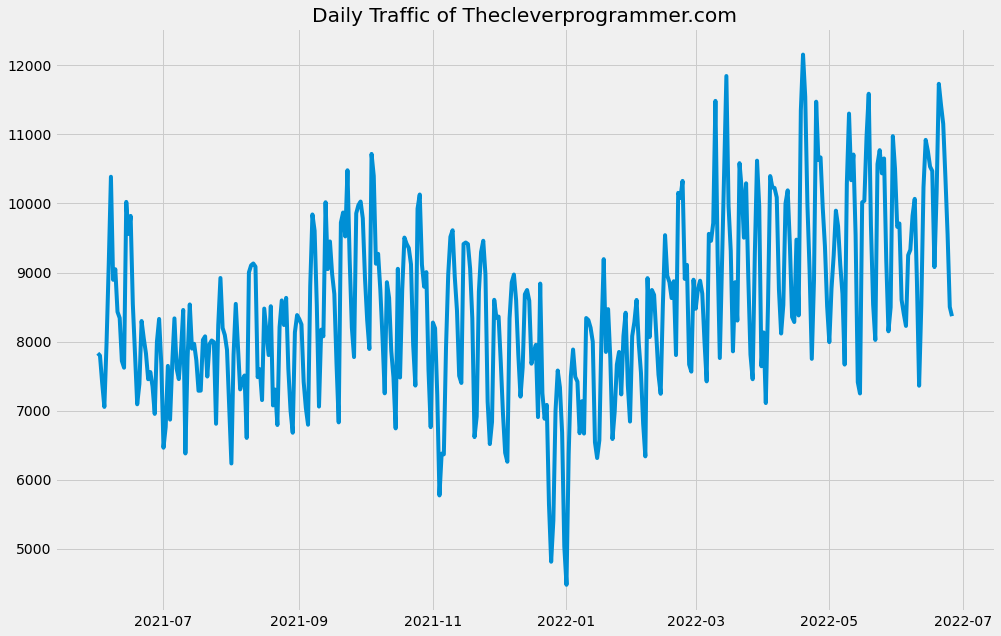

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

Our website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know if the dataset is seasonal or not while working on the problem of Time Series Forecasting. Below is how we can have a look at whether our dataset is stationary or seasonal:

<ipython-input-6-eb826e1f10af>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data["Views"],


<Figure size 432x288 with 0 Axes>

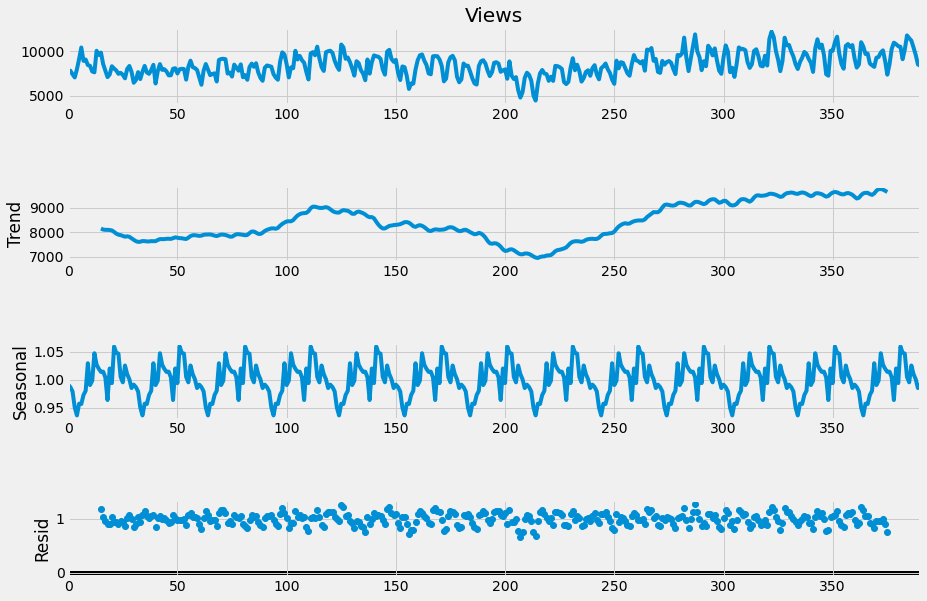

In [6]:
result = seasonal_decompose(data["Views"],
                           model = "multiplicative",
                           freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

I will be using the Seasonal ARIMA (SARIMA) model to forecast traffic on the website. Before using the SARIMA model, it is necessary to find the p, d, and q values.

As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

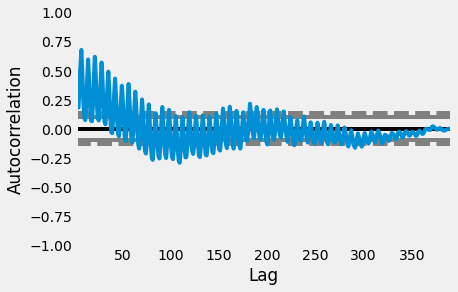

In [7]:
pd.plotting.autocorrelation_plot(data["Views"])

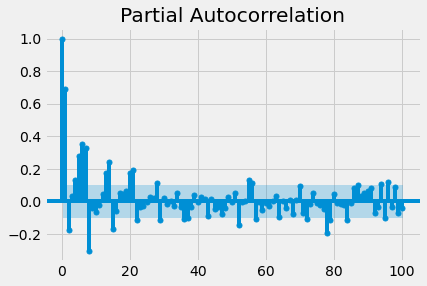

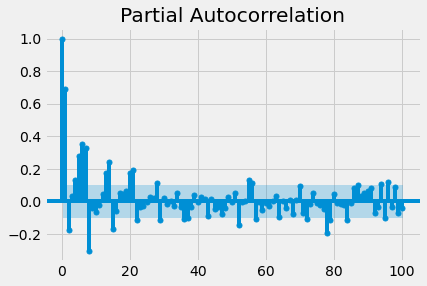

In [8]:
plot_pacf(data["Views"], lags = 100)

Now here’s how we can train a SARIMA model for the task of website traffic forecasting:

In [9]:
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data["Views"],
                                 order=(p, d, q),
                                 seasonal_order = (p, d, q, 12))
model = model.fit()
print(model.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.274
Date:                            Sun, 14 May 2023   AIC                           6228.549
Time:                                    17:49:54   BIC                           6287.572
Sample:                                         0   HQIC                          6251.974
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7630      0.128      5.979      0.000       0.513       1.013
ar.L2         -0.8138      0.134   

Now let’s forecast traffic on the website for the next 50 days:

In [10]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9813.923977
392    10828.998646
393    10783.459808
394     9855.491714
395     8937.384303
396     8414.106784
397     8914.202638
398     9690.916198
399    10390.887346
400    10590.792451
401     9869.516038
402     9270.400895
403     8923.737508
404     8986.030410
405    10287.823807
406    10869.750476
407    10811.891830
408    10008.305094
409     9380.075862
410     8562.214912
411     9046.879176
412    10170.864916
413    10627.972429
414    10846.501455
415    10260.967748
416     9419.724882
417     8953.140324
418     9081.401703
419     9920.654910
420    10352.374640
421    10774.305978
422     9966.962342
423     9545.860008
424     8918.991656
425     8802.401236
426    10060.184265
427    10823.161268
428    10909.019770
429    10324.563474
430     9380.240585
431     8618.280725
432     8626.054898
433     9988.271918
434    10514.407312
435    10861.251879
436    10398.251205
437     9350.063724
438     9143.916959
439     9301.582611
440    10214.547367


Here’s how we can plot the predictions:

<AxesSubplot:>

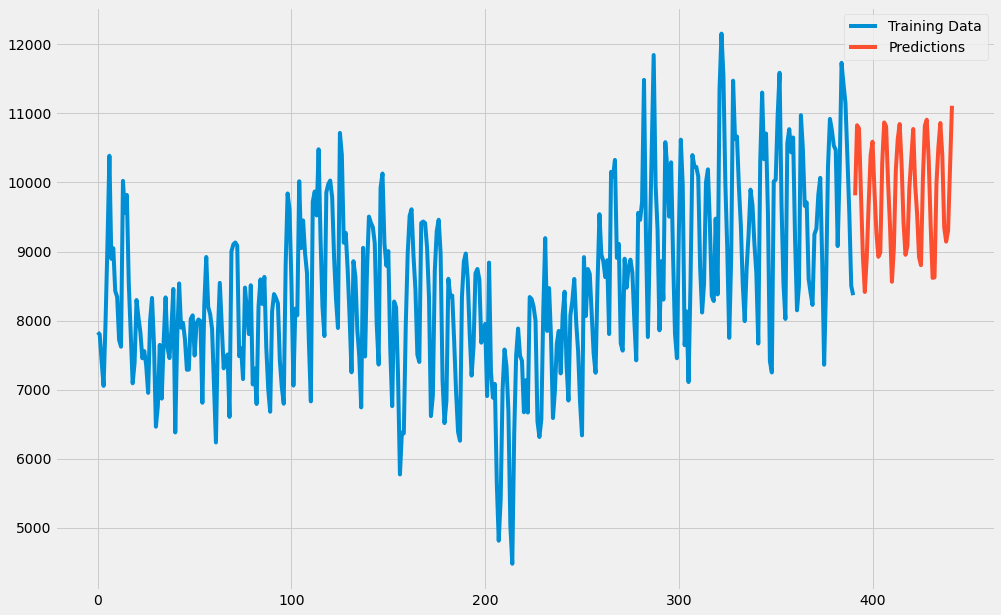

In [11]:
data["Views"].plot(legend=True, label = "Training Data",
                  figsize = (15, 10))
predictions.plot(legend = True, label = "Predictions")